# Debugging

<img align="right" src="https://movingpandas.github.io/movingpandas/assets/img/movingpandas.png">

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/movingpandas/movingpandas/main?filepath=tutorials/0-debug.ipynb)

Minimal working examples of bugs

**<p style="color:#e31883">This notebook demonstrates the current development version of MovingPandas.</p>**

For tutorials using the latest release visit https://github.com/movingpandas/movingpandas-examples.


In [1]:
import urllib
import os
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame, read_file
from shapely.geometry import Point, LineString, Polygon
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

import sys
sys.path.append("..")
import movingpandas as mpd
mpd.show_versions()


h:\miniconda3\envs\movingpandas\lib\site-packages\dask\dataframe\__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)



MovingPandas 0.18.1

SYSTEM INFO
-----------
python     : 3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:40:08) [MSC v.1938 64 bit (AMD64)]
executable : h:\miniconda3\envs\movingpandas\python.exe
machine    : Windows-10-10.0.19045-SP0

GEOS, GDAL, PROJ INFO
---------------------
GEOS       : None
GEOS lib   : None
GDAL       : None
GDAL data dir: None
PROJ       : 9.4.0
PROJ data dir: H:\miniconda3\envs\movingpandas\Library\share\proj

PYTHON DEPENDENCIES
-------------------
geopandas  : 1.0.0
pandas     : 2.2.2
fiona      : None
numpy      : 2.0.0
shapely    : 2.0.4
rtree      : 1.2.0
pyproj     : 3.6.1
matplotlib : 3.8.4
mapclassify: 2.6.1
geopy      : 2.4.1
holoviews  : 1.19.0
hvplot     : 0.10.0
geoviews   : 1.12.0
stonesoup  : 1.2


## Creating a trajectory from scratch


In [2]:
df = pd.DataFrame([
  {'geometry':Point(0,0), 't':datetime(2018,1,1,12,0,0)},
  {'geometry':Point(6,0), 't':datetime(2018,1,1,12,6,0)},
  {'geometry':Point(6,6), 't':datetime(2018,1,1,12,10,0)},
  {'geometry':Point(9,9), 't':datetime(2018,1,1,12,15,0)}
]).set_index('t')
gdf = GeoDataFrame(df, crs=31256)
toy_traj = mpd.Trajectory(gdf, 1)
toy_traj.df

,geometry,traj_id
t,,
2018-01-01 12:00:00,POINT (0 0),1
2018-01-01 12:06:00,POINT (6 0),1
2018-01-01 12:10:00,POINT (6 6),1
2018-01-01 12:15:00,POINT (9 9),1


In [3]:
toy_traj.add_speed(overwrite=True).df

,geometry,traj_id,speed
t,,,
2018-01-01 12:00:00,POINT (0 0),1,0.016667
2018-01-01 12:06:00,POINT (6 0),1,0.016667
2018-01-01 12:10:00,POINT (6 6),1,0.025000
2018-01-01 12:15:00,POINT (9 9),1,0.014142


In [4]:
xmin, xmax, ymin, ymax = 2, 8, -10, 5
polygon = Polygon([(xmin, ymin), (xmin, ymax), (xmax, ymax), (xmax, ymin), (xmin, ymin)])
polygon_gdf = GeoDataFrame(pd.DataFrame([{'geometry':polygon, 'id':1}]), crs=4326)

In [5]:
intersections = toy_traj.clip(polygon)
intersections

TrajectoryCollection with 1 trajectories

In [6]:
intersections = toy_traj.clip(polygon)
intersections

TrajectoryCollection with 1 trajectories

<Axes: >

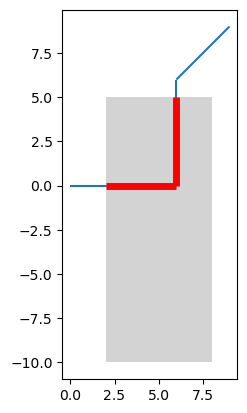

In [7]:
ax = toy_traj.plot()
polygon_gdf.plot(ax=ax, color='lightgray')
intersections.plot(ax=ax, color='red', linewidth=5)

<Axes: >

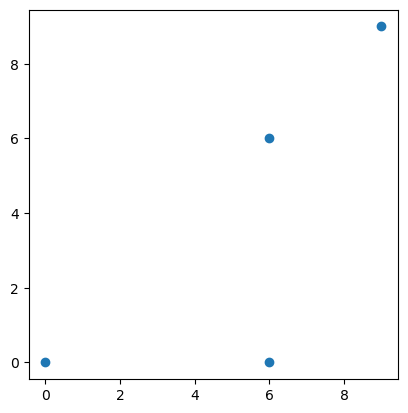

In [8]:
toy_traj.add_speed(overwrite=True)
toy_traj.df.plot()

<Axes: >

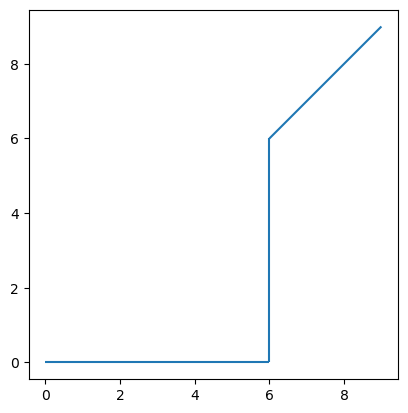

In [9]:
toy_traj.plot(width=7)

<Axes: >

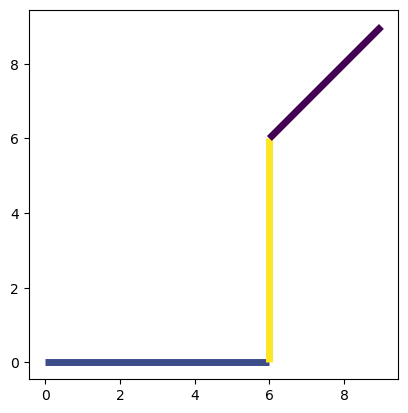

In [10]:
toy_traj.plot(column="speed", linewidth=5)

In [11]:
hv_defaults = {'frame_width':400, 'frame_height':300}
toy_traj.hvplot(line_width=5, **hv_defaults)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Path.I   :Path   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (triangle_angle)

In [12]:
toy_traj.hvplot(c='speed', line_width=7, **hv_defaults)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Path.I   :Path   [Longitude,Latitude]   (speed)
   .Points.I :Points   [Longitude,Latitude]   (speed,triangle_angle)

In [13]:
toy_traj.hvplot_pts(c='speed', line_width=7, **hv_defaults)

:Overlay
   .Points.I  :Points   [Longitude,Latitude]   (speed,triangle_angle,dash_angle)
   .Points.II :Points   [Longitude,Latitude]   (speed,triangle_angle,dash_angle)

In [14]:
gdf = read_file('data/demodata_geolife.gpkg')
tc = mpd.TrajectoryCollection(gdf, 'trajectory_id', t='t')
generalized = mpd.MinDistanceGeneralizer(tc).generalize(tolerance=100)


g:\Documents\GitHub\movingpandas\movingpandas\tutorials\..\movingpandas\trajectory.py:137: TimeZoneWarning: Time zone information dropped from trajectory. All dates and times will use local time. This is applied by doing df.tz_localize(None). To use UTC or a different time zone, convert and drop time zone information prior to trajectory creation.
  warnings.warn(
g:\Documents\GitHub\movingpandas\movingpandas\tutorials\..\movingpandas\trajectory.py:137: TimeZoneWarning: Time zone information dropped from trajectory. All dates and times will use local time. This is applied by doing df.tz_localize(None). To use UTC or a different time zone, convert and drop time zone information prior to trajectory creation.
  warnings.warn(
g:\Documents\GitHub\movingpandas\movingpandas\tutorials\..\movingpandas\trajectory.py:137: TimeZoneWarning: Time zone information dropped from trajectory. All dates and times will use local time. This is applied by doing df.tz_localize(None). To use UTC or a different

In [15]:
generalized.hvplot(tiles='CartoLight',  **hv_defaults)

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Path.I     :Path   [Longitude,Latitude]
   .Path.II    :Path   [Longitude,Latitude]
   .Path.III   :Path   [Longitude,Latitude]
   .Path.IV    :Path   [Longitude,Latitude]
   .Path.V     :Path   [Longitude,Latitude]
   .Points.I   :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.II  :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.III :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.IV  :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.V   :Points   [Longitude,Latitude]   (triangle_angle)

In [16]:
generalized.hvplot(tiles=None, c='speed', clim=(0,20), line_width=2, marker_size=0, **hv_defaults)

:Path   [Longitude,Latitude]   (speed)

In [17]:
feature = {
    "geometry": {
        "type": "Polygon",
        "coordinates": [[(116, 39), (116.5, 39), (116.5, 40), (116, 40), (116, 39)]],
    },
    "properties": {"id": 1, "name": "foo"},
}

In [18]:
intersections = generalized.intersection(feature)
intersections.hvplot(tiles=None, c='speed', clim=(0,20), line_width=2, marker_size=0, **hv_defaults)

:Path   [Longitude,Latitude]   (speed)

In [19]:
#intersections.add_speed()
intersections.hvplot_pts(tiles=None, c='speed', clim=(0,20), **hv_defaults)

:Overlay
   .Points.I  :Points   [Longitude,Latitude]   (speed,triangle_angle,dash_angle)
   .Points.II :Points   [Longitude,Latitude]   (speed,triangle_angle,dash_angle)

In [20]:
intersections.hvplot_pts(tiles=None,  **hv_defaults)

building colormap ...
{'1_0': '#1f77b4', '2_0': '#ff7f0e', '2_1': '#2ca02c', '3_0': '#d62728', '4_0': '#9467bd', '5_0': '#8c564b', '5_1': '#e377c2'}


:Overlay
   .Points.I    :Points   [Longitude,Latitude]   (triangle_angle,dash_angle)
   .Points.II   :Points   [Longitude,Latitude]   (triangle_angle,dash_angle)
   .Points.III  :Points   [Longitude,Latitude]   (triangle_angle,dash_angle)
   .Points.IV   :Points   [Longitude,Latitude]   (triangle_angle,dash_angle)
   .Points.V    :Points   [Longitude,Latitude]   (triangle_angle,dash_angle)
   .Points.VI   :Points   [Longitude,Latitude]   (triangle_angle,dash_angle)
   .Points.VII  :Points   [Longitude,Latitude]   (triangle_angle,dash_angle)
   .Points.VIII :Points   [Longitude,Latitude]   (triangle_angle,dash_angle)
   .Points.IX   :Points   [Longitude,Latitude]   (triangle_angle,dash_angle)
   .Points.X    :Points   [Longitude,Latitude]   (triangle_angle,dash_angle)
   .Points.XI   :Points   [Longitude,Latitude]   (triangle_angle,dash_angle)
   .Points.XII  :Points   [Longitude,Latitude]   (triangle_angle,dash_angle)
   .Points.XIII :Points   [Longitude,Latitude]   (triangle_angle,dash_angle)
   .Points.XIV  :Points   [Longitude,Latitude]   (triangle_angle,dash_angle)

In [21]:
intersections.to_point_gdf().explore()

TypeError: Object of type Timestamp is not JSON serializable